In [9]:
import matplotlib
import numpy as np
%matplotlib inline
#matplotlib.style.use('ggplot')
import gym

import torch.optim as optim

from agents.hdqn_mdp import hDQN, OptimizerSpec
from hdqn import hdqn_learning
from utils.plotting import plot_episode_stats, plot_visited_states
from utils.schedule import LinearSchedule

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
NUM_EPISODES = 1000
BATCH_SIZE = 128
GAMMA = 1.0
REPLAY_MEMORY_SIZE = 1000000
LEARNING_RATE = 0.00025
ALPHA = 0.95
EPS = 0.01

optimizer_spec = OptimizerSpec(
    constructor=optim.RMSprop,
    kwargs=dict(lr=LEARNING_RATE, alpha=ALPHA, eps=EPS),
)

exploration_schedule = LinearSchedule(5000, 0.1, 1)

agent = hDQN(
    optimizer_spec=optimizer_spec,
    replay_memory_size=REPLAY_MEMORY_SIZE,
    batch_size=BATCH_SIZE,
)

print (agent.get_quadrant(0,0))

#env = StochasticMDPEnv()
env = gym.make('Reacher-v2')

print (agent.idx_2_action[54])

0
(-1.0, 0.5)


In [11]:
agent, stats = hdqn_learning(
    env=env,
    agent=agent,
    num_episodes=NUM_EPISODES,
    exploration_schedule=exploration_schedule,
    gamma=GAMMA,
)

/Users/nishantgurunath/Documents/CMU/10-708/Project/HRL/pytorch-hdqn-reacher/agents/hdqn_mdp.py:137: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  return self.controller(Variable(joint_state_goal, volatile=True)).data.max(1)[1].cpu()
/Users/nishantgurunath/Documents/CMU/10-708/Project/HRL/pytorch-hdqn-reacher/agents/hdqn_mdp.py:126: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  x = self.meta_controller(Variable(state, volatile=True)).data.max(1)[1].cpu()


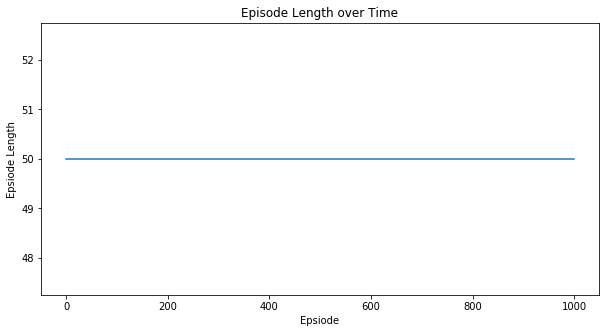

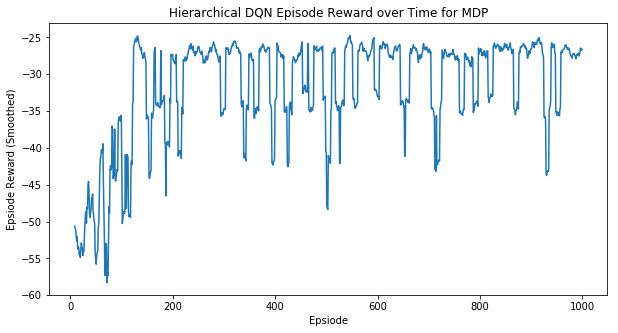

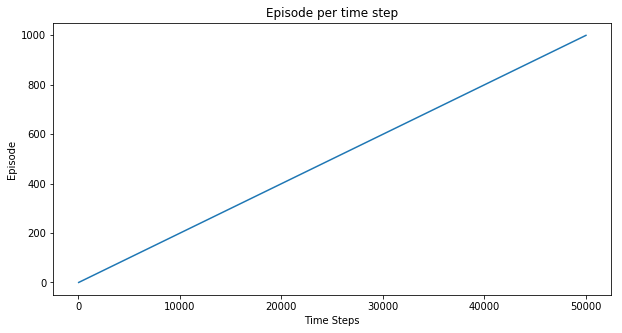

(<Figure size 720x360 with 1 Axes>,
 <Figure size 720x360 with 1 Axes>,
 <Figure size 720x360 with 1 Axes>)

In [12]:
plot_episode_stats(stats)

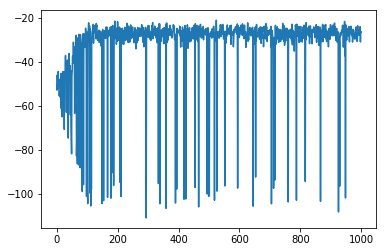

In [13]:
rewards = stats.episode_rewards
matplotlib.pyplot.plot(rewards)

In [ ]:
np.save('./results/stats.npy',stats)

In [1]:



env = gym.make('Reacher-v2')

for i in range(10000):
    current_state = env.reset()  

    goal_reached = False
    done = False
    env.render()
    time.sleep(1)
    
    while not done and not goal_reached: 
        env.render()
        goal = agent.select_goal(current_state.reshape(1,-1), 0)[0]
        encoded_goal = one_hot_goal(goal)
        joint_state_goal = np.concatenate((current_state.reshape(1,-1), encoded_goal),axis=1)
        action = agent.select_action(joint_state_goal, 0)[0]
        action_x, action_y = agent.idx_2_action[int(action)]
        current_state, rew, done, _ = env.step(action_y,action_x)
                                               
        


env.close()


NameError: name 'gym' is not defined